In [1]:
import numpy as np

### Spring mass system

In [2]:
m = 1
k = 1

$v=x^{'}$

$a = v^{'} = x^{''}$

$b = p^{'}$

In [10]:
#Initial Conditions
x10 = 0
x20 = 1
v10 = 0
v20 = 0
p10 = 0
p20 = 0

#### Lagrangian EOM

In [6]:
a1 = lambda x1, x2: (-2*k/m)*x1 + (k/m)*x2
a2 = lambda x1, x2: (-2*k/m)*x2 + (k/m)*x1

In [2]:
def integrator_l1(dt = 0.01, limit = 500):
    t0 = 0
    
    times = []
    x1_array = []
    x2_array = []
    
    times.append(t0)
    x1_array.append(x10)
    x2_array.append(x20)
    
    x1i = x10
    x2i = x20
    v1i = v10
    v2i = v20
    
    t = t0 + dt
    x1f = x1i + v1i*dt
    x2f = x2i + v2i*dt
    v1f = v1i + a1(x1f, x2f)*dt
    v2f = v2i + a2(x1f, x2f)*dt
    
    t0 = t
    x1i = x1f
    x2i = x2f
    v1i = v1f
    v2i = v2f
    
    for i in range(limit):
        times.append(t0)
        x1_array.append(x1i)
        x2_array.append(x2i)
    
        t = t0 + dt
        x1f = x1i + v1i*dt
        x2f = x2i + v2i*dt
        v1f = v1i + a1(x1f, x2f)*dt
        v2f = v2i + a2(x1f, x2f)*dt
    
        t0 = t
        x1i = x1f
        x2i = x2f
        v1i = v1f
        v2i = v2f
    
    times.append(t)
    x1_array.append(x1f)
    x2_array.append(x2f)
    
    return np.array(times), np.array(x1_array), np.array(x2_array)

#### Hamiltonian EOM

In [8]:
b1 = lambda x1, x2: -2*k*x1 + x2
b2 = lambda x1, x2: -2*k*x2 + x1
v1 = lambda p1: p1/m
v2 = lambda p2: p2/m

In [36]:
def integrator_h1(dt = 0.01, limit = 500):
    t0 = 0
    
    times = []
    x1_array = []
    x2_array = []
    
    times.append(t0)
    x1_array.append(x10)
    x2_array.append(x20)
    
    x1i = x10
    x2i = x20
    p1i = p10
    p2i = p20
    
    t = t0 + dt
    x1f = x1i + v1(p1i)*dt
    x2f = x2i + v2(p2i)*dt
    p1f = p1i + b1(x1f, x2f)*dt
    p2f = p2i + b2(x1f, x2f)*dt
    
    t0 = t
    x1i = x1f
    x2i = x2f
    p1i = p1f
    p2i = p2f
    
    for i in range(limit):
        times.append(t0)
        x1_array.append(x1i)
        x2_array.append(x2i)
    
        t = t0 + dt
        x1f = x1i + v1(p1i)*dt
        x2f = x2i + v2(p2i)*dt
        p1f = p1i + b1(x1f, x2f)*dt
        p2f = p2i + b2(x1f, x2f)*dt
    
        t0 = t
        x1i = x1f
        x2i = x2f
        p1i = p1f
        p2i = p2f
    
    times.append(t)
    x1_array.append(x1f)
    x2_array.append(x2f)
    
    return np.array(times), np.array(x1_array), np.array(x2_array)

#### Plots

In [25]:
l1 = integrator_l1()
times_lagrangian = l1[0]
x1_lagrangian = l1[1]
x2_lagrangian = l1[2]

In [22]:
h1 = integrator_h1()
times_hamiltonian = h1[0]
x1_hamiltonian = h1[1]
x2_hamiltonian = h1[2]

In [14]:
import matplotlib.pyplot as plt
%matplotlib nbagg

<IPython.core.display.Javascript object>


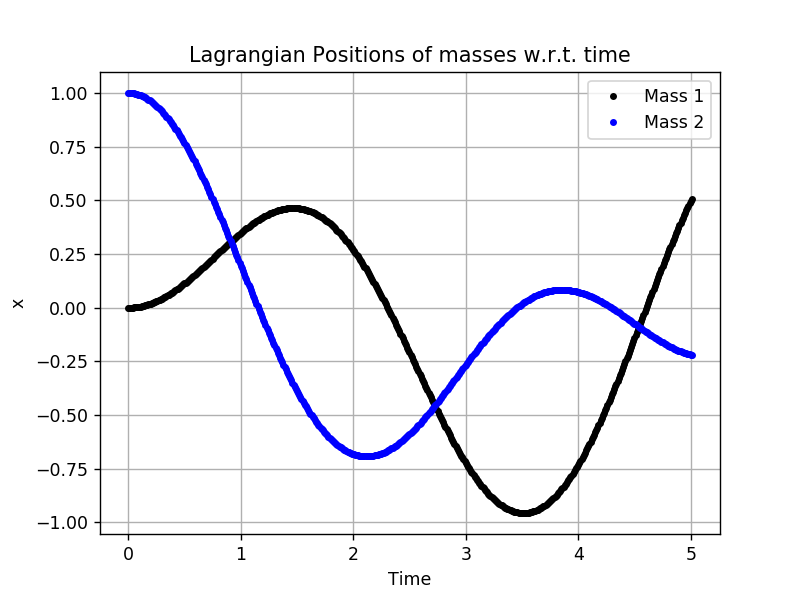

<IPython.core.display.Javascript object>


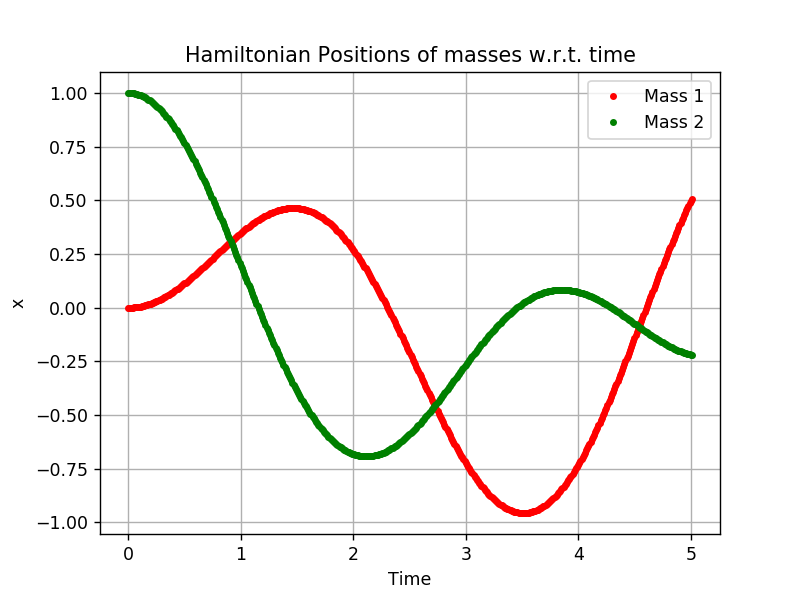

In [30]:
plt.close()

fig1 = plt.figure()
plt.plot(times_lagrangian, x1_lagrangian, 'k.', label= 'Mass 1')
plt.plot(times_lagrangian, x2_lagrangian, 'b.', label= 'Mass 2')
plt.grid(True)
plt.title("Lagrangian Positions of masses w.r.t. time")
plt.ylabel("x")
plt.xlabel("Time")
plt.legend()
plt.show()

fig2= plt.figure()
plt.plot(times_hamiltonian, x1_hamiltonian, 'r.', label= 'Mass 1')
plt.plot(times_hamiltonian, x2_hamiltonian, 'g.', label= 'Mass 2')
plt.grid(True)
plt.title("Hamiltonian Positions of masses w.r.t. time")
plt.ylabel("x")
plt.xlabel("Time")
plt.legend()
plt.show()

### Double Pendulum

In [2]:
m = 1
l = 1
g = 9.81

In [3]:
#Initial Conditions
x10 = 0
x20 = np.pi/12
v10 = 0
v20 = 0
p10 = 0
p20 = 0

#### Lagranigian EOM

In [4]:
a1 = lambda x1, x2, v1, v2: (np.cos(x1 - x2)*(g*np.sin(x2) - v2*np.sin(x1 - x2)*(v2 - 2*v1)) + v1*np.sin(x1 - x2)*(v1 - 2*v2) - 2*g*np.sin(x1))/(2 - (np.cos(x1 - x2)**2))
a2 = lambda x1, x2, v1, v2: (np.cos(x1 - x2)*(g*np.sin(x1) - 0.5*v1*np.sin(x1 - x2)*(v1 - 2*v2)) + v2*np.sin(x1 - x2)*(v2 - 2*v1) - g*np.sin(x2))/(2 - (np.cos(x1 - x2)**2))

#Note, am keeping in same format as previous part, so as to recycle the code

In [5]:
def integrator_l2(dt = 0.01, limit = 500):
    t0 = 0
    
    times = []
    x1_array = []
    x2_array = []
    
    times.append(t0)
    x1_array.append(x10)
    x2_array.append(x20)
    
    x1i = x10
    x2i = x20
    v1i = v10
    v2i = v20
    
    t = t0 + dt
    x1f = x1i + v1i*dt
    x2f = x2i + v2i*dt
    v1f = v1i + a1(x1f, x2f, v1i, v2i)*dt
    v2f = v2i + a2(x1f, x2f, v1i, v2i)*dt
    
    t0 = t
    x1i = x1f
    x2i = x2f
    v1i = v1f
    v2i = v2f
    
    for i in range(limit):
        times.append(t0)
        x1_array.append(x1i)
        x2_array.append(x2i)
    
        t = t0 + dt
        x1f = x1i + v1i*dt
        x2f = x2i + v2i*dt
        v1f = v1i + a1(x1f, x2f, v1f, v2f)*dt
        v2f = v2i + a2(x1f, x2f, v1f, v2f)*dt
    
        t0 = t
        x1i = x1f
        x2i = x2f
        v1i = v1f
        v2i = v2f
    
    times.append(t)
    x1_array.append(x1f)
    x2_array.append(x2f)
    
    return np.array(times), np.array(x1_array), np.array(x2_array)

#### Hamiltonian EOM

In [11]:
def b1(x1, x2, p1, p2): 
    va = v1(x1, x2, p1, p2)
    vb = v2(x1, x2, p1, p2)
    p_dot = 2*a1(x1, x2, va, vb) + np.cos(x1 - x2)*a2(x1, x2, va, vb) - np.sin(x1 - x2)*(va*vb - vb**2)
    return p_dot

def b2(x1, x2, p1, p2): 
    va = v1(x1, x2, p1, p2)
    vb = v2(x1, x2, p1, p2)
    p_dot = a2(x1, x2, va, vb) + np.cos(x1 - x2)*a1(x1, x2, va, vb) - np.sin(x1 - x2)*(va**2 - va*vb) 
    return p_dot

In [8]:
v1 = lambda x1, x2, p1, p2: (p1 - np.cos(x1 - x2)*p2)/(2 - (np.cos(x1 - x2)**2))
v2 = lambda x1, x2, p1, p2: (2*p2 - np.cos(x1 - x2)*p1)/(2 - (np.cos(x1 - x2)**2))

#Note, am keeping in same format as previous part, so as to recycle the code

In [12]:
def integrator_h2(dt = 0.01, limit = 500):
    t0 = 0
    
    times = []
    x1_array = []
    x2_array = []
    
    times.append(t0)
    x1_array.append(x10)
    x2_array.append(x20)
    
    x1i = x10
    x2i = x20
    p1i = p10
    p2i = p20
    
    t = t0 + dt
    x1f = x1i + v1(x1i, x2i, p1i, p2i)*dt
    x2f = x2i + v2(x1i, x2i, p1i, p2i)*dt
    p1f = p1i + b1(x1f, x2f, p1i, p2i)*dt
    p2f = p2i + b2(x1f, x2f, p1i, p2i)*dt
    
    t0 = t
    x1i = x1f
    x2i = x2f
    p1i = p1f
    p2i = p2f
    
    for i in range(limit):
        times.append(t0)
        x1_array.append(x1i)
        x2_array.append(x2i)
    
        t = t0 + dt
        x1f = x1i + v1(x1i, x2i, p1i, p2i)*dt
        x2f = x2i + v2(x1i, x2i, p1i, p2i)*dt
        p1f = p1i + b1(x1f, x2f, p1i, p2i)*dt
        p2f = p2i + b2(x1f, x2f, p1i, p2i)*dt
    
        t0 = t
        x1i = x1f
        x2i = x2f
        p1i = p1f
        p2i = p2f
    
    times.append(t)
    x1_array.append(x1f)
    x2_array.append(x2f)
    
    return np.array(times), np.array(x1_array), np.array(x2_array)

#### Plots

In [10]:
l2 = integrator_l2()
times_lagrangian = l2[0]
x1_lagrangian = l2[1]
x2_lagrangian = l2[2]

In [13]:
h2 = integrator_h2()
times_hamiltonian = h2[0]
x1_hamiltonian = h2[1]
x2_hamiltonian = h2[2]

In [17]:
import matplotlib.pyplot as plt
%matplotlib nbagg

<IPython.core.display.Javascript object>


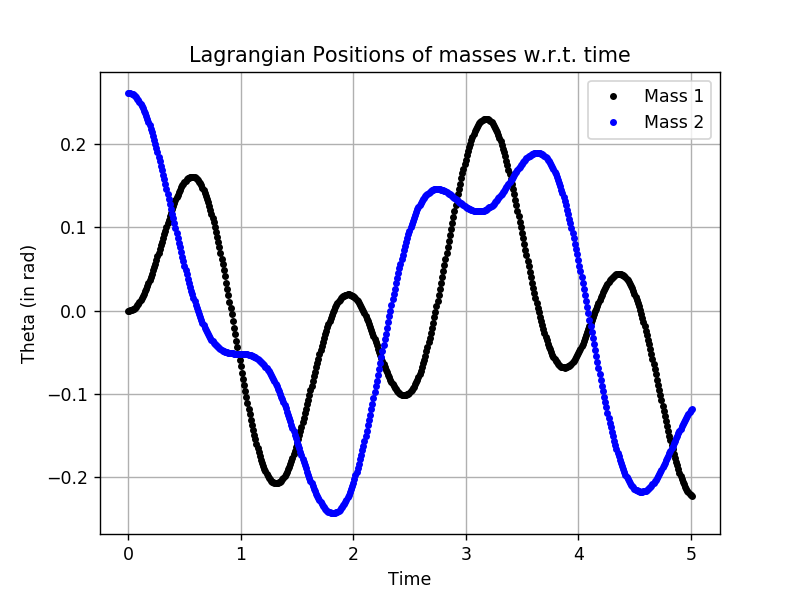

In [16]:
plt.close()

fig1 = plt.figure()
plt.plot(times_lagrangian, x1_lagrangian, 'k.', label= 'Mass 1')
plt.plot(times_lagrangian, x2_lagrangian, 'b.', label= 'Mass 2')
plt.grid(True)
plt.title("Lagrangian Positions of masses w.r.t. time")
plt.ylabel("Theta (in rad)")
plt.xlabel("Time")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


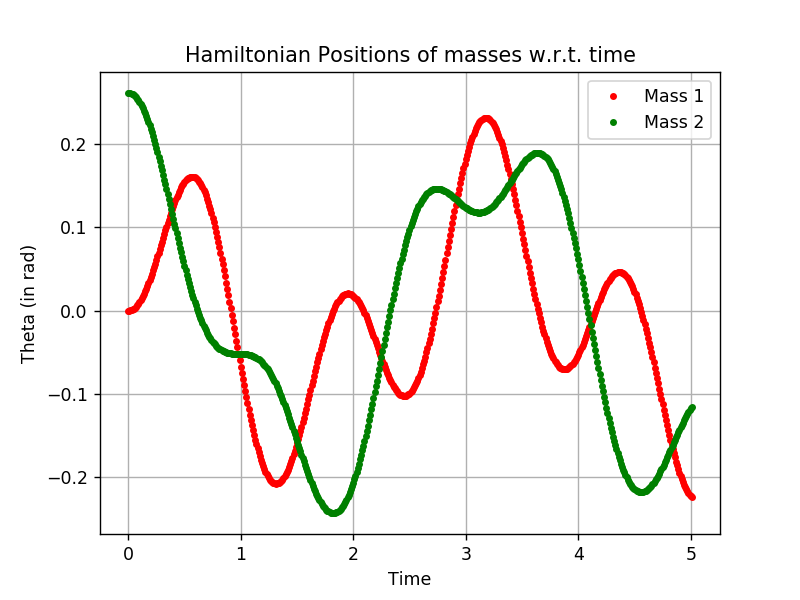

In [19]:
fig2= plt.figure()
plt.plot(times_hamiltonian, x1_hamiltonian, 'r.', label= 'Mass 1')
plt.plot(times_hamiltonian, x2_hamiltonian, 'g.', label= 'Mass 2')
plt.grid(True)
plt.title("Hamiltonian Positions of masses w.r.t. time")
plt.ylabel("Theta (in rad)")
plt.xlabel("Time")
plt.legend()
plt.show()